**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

# **Support Vector Machine Algorithm**

The [Support Vector Machine (SVM)](https://www.ibm.com/docs/en/spss-modeler/saas?topic=models-about-svm) is a robust classification and regression technique that maximizes the predictive accuracy of a model without overfitting the training data. SVM is particularly suited to analyzing data with very large numbers (for example, thousands) of predictor fields.

SVM has applications in many disciplines, including customer relationship management (CRM), facial and other image recognition, bioinformatics, text mining concept extraction, intrusion detection, protein structure prediction, and voice and speech recognition.

#### **Task:**   
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy

### **Dataset available on:** <br>
[UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/73/mushroom) <br>
[Kaggle Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download)

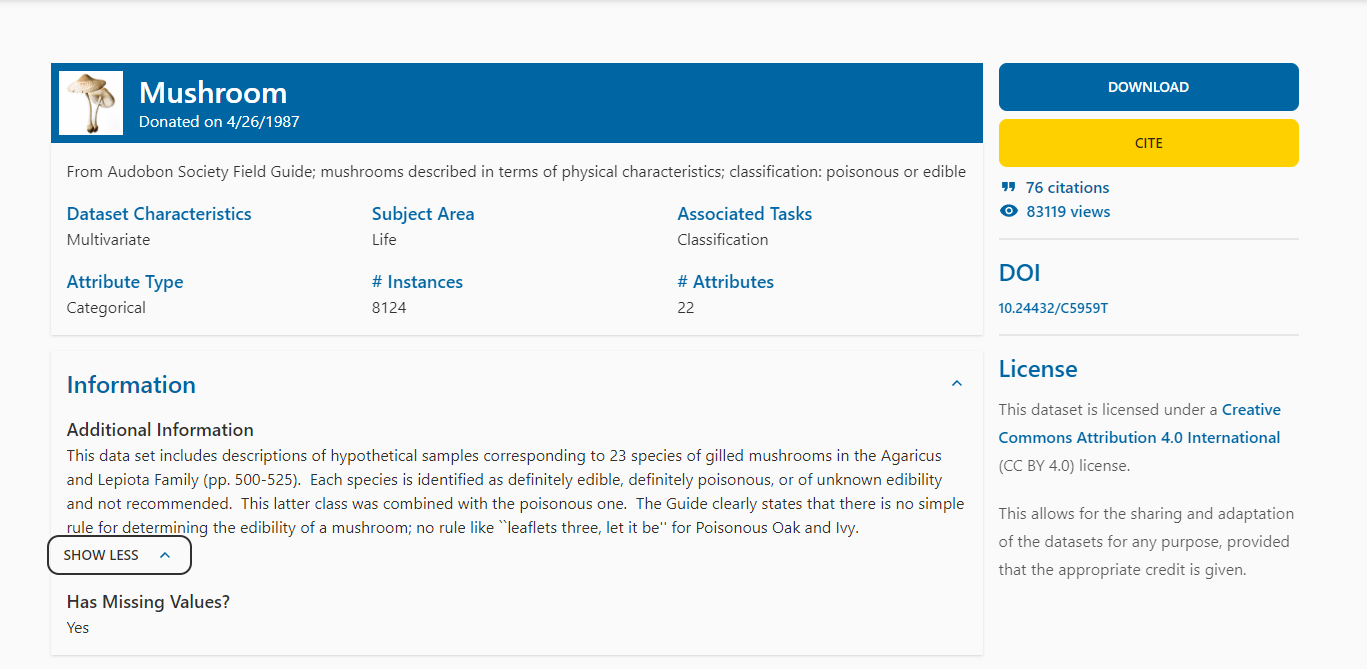

### **Imports**

In [1]:
import pandas as pd # wrangling the data
from sklearn.preprocessing import MinMaxScaler # standardising the data
from sklearn.model_selection import train_test_split # split the dataset into training and test set
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encoding the data in to numerical values from strings
from sklearn import svm, datasets  # the svm and datasets for the algorithm classifier
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay # for model evaluation
from sklearn.model_selection import GridSearchCV # cross validation and parameter tuning
from sklearn.metrics import classification_report # summary report or the metrics

### **Loading the database**

#### **Read the csv file and study the database**

In [2]:
# read the data using pandas
mushroom_data = pd.read_csv('mushrooms-full-dataset.csv', dtype = str)

#### **Basic EDA**

In [3]:
# display the first five rows using the head function
mushroom_data.head(5)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# show the column names
mushroom_data.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [5]:
# shape of the data
mushroom_data.shape

(8124, 22)

In [6]:
# check for missing values
mushroom_data.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# show the distribution of the data
mushroom_data['poisonous'].value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [8]:
# create a copy of the dataset for visualization purpose
default_df = mushroom_data.copy()
default_df.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

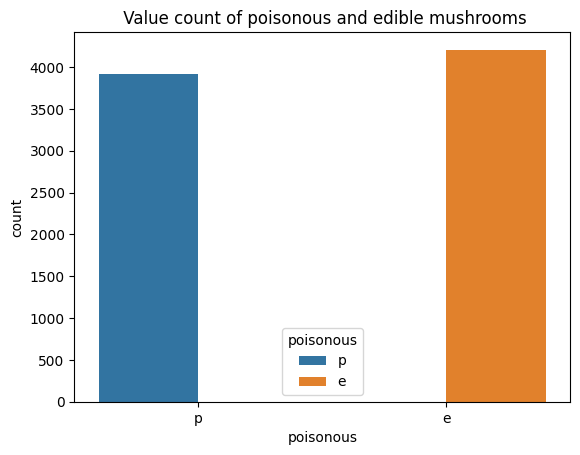

In [9]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=default_df, x="poisonous", hue="poisonous").set(title = " Value count of poisonous and edible mushrooms");

## **Preprocessing:**

#### **Define the target and the inputs**

In [10]:
target = mushroom_data['poisonous'] # value to be predicted
inputs = mushroom_data.drop(['poisonous'], axis = 1 ) # drop the target column

#### **Create a training and a testing dataset**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(inputs, # independent or x values
                                                    target, # dependent or x values
                                                    test_size = 0.2, # split the data into 80% training set and 20% test set
                                                    random_state = 365, # for reproducibility
                                                    stratify = target   # get a balance both in the training and test set
                                                      )

#### **Check the result from the stratification**

In [12]:
# let see the training distribution after train_test_split
y_train.value_counts()

e    3366
p    3133
Name: poisonous, dtype: int64

In [13]:
# let see the testing distribution after train_test_split
y_test.value_counts()

e    842
p    783
Name: poisonous, dtype: int64

### **Define a separate encoder for the target and the inputs**

In [14]:
enc_i = OrdinalEncoder() # transforms categorical data into numerical
enc_t = LabelEncoder() # helps with preserving the target labels

#### **Apply the fit_transform() method on the training data and the transform() method on the test data**

In [15]:
# for converting to numerical values
x_train_transf = enc_i.fit_transform(x_train)
x_test_transf = enc_i.transform(x_test)


# maintain the label
y_train_transf = enc_t.fit_transform(y_train)
y_test_transf = enc_t.transform(y_test)

Let's check the train set to see if they have transfom:

In [16]:
# y_train_transf
y_train_transf

array([0, 0, 0, ..., 1, 0, 0])

In [17]:
# x_train_transf
x_train_transf

array([[3., 3., 2., ..., 7., 1., 6.],
       [5., 3., 4., ..., 2., 5., 4.],
       [2., 0., 4., ..., 2., 4., 0.],
       ...,
       [2., 3., 2., ..., 7., 4., 0.],
       [3., 0., 8., ..., 7., 3., 1.],
       [5., 0., 3., ..., 3., 4., 0.]])

### **Rescaling**

**In order for the SVC to work correctly the inputs need to be rescaled to the range(-1,1)**

In [18]:
scaling = MinMaxScaler(feature_range = (-1,1)).fit(x_train_transf) # scaling the training set
x_train_rescaled = scaling.transform(x_train_transf) # transform the scaled data

#### **Classification**

**Linear Kernel:**

In [19]:
C = 1.0 # helps us decide how wide the margin of the classifiers are

In [20]:
svc = svm.SVC(kernel = "linear", C = C).fit(x_train_rescaled, y_train_transf) # fit the model on the x_train_rescaled, y_train_transf

In [21]:
y_pred_test = svc.predict(scaling.transform(x_test_transf)) # predict test transform

### **Model Evaluation:**

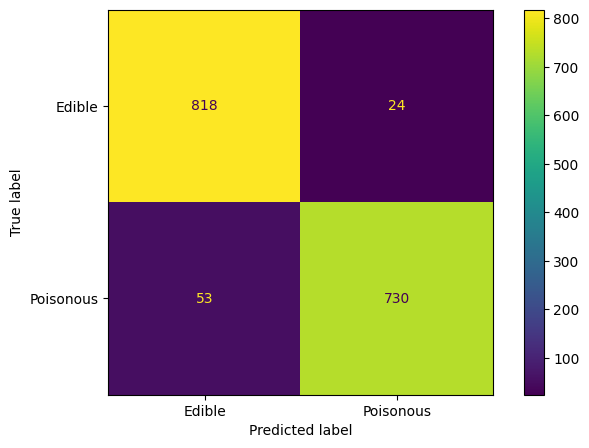

In [22]:
# display the confusionMatrix
sns.reset_orig() # to remove the seaborn visual

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_pred_test),
    display_labels=['Edible', "Poisonous"]
)

cmp.plot(ax=ax);

In [23]:
# print a summary classification_report
print(classification_report(y_test_transf, y_pred_test, target_names = ['Edible', "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.94      0.97      0.96       842
   Poisonous       0.97      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### **Cross-validation to improve our classifier:**

**[Cross-validation](https://docs.aws.amazon.com/machine-learning/latest/dg/cross-validation.html):** is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

### **Hyperparameter Tuning with GridSearchCV to improve model performance and finding the best model**

**Choose the best kernel and the optimal C parameter based on Cross Validation of the training data**

In [24]:
# parameters to tuned
tuned_parameters = [
    {"kernel":["linear"], "C":[1,10]},
    {"kernel":["poly"], "C":[1,10]},
    {"kernel":["rbf"],  "gamma": [1e-3, 1e-4], "C":[1, 10]},
]

In [25]:
# metrics
scores = ["precision", "recall"]

In [26]:
def hyperTune():
  for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true, y_pred))
    print()

# assign the function to the object gridsearch
gridsearch = hyperTune()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set:

0.952 (+/-0.013) for {'C': 1, 'kernel': 'linear'}
0.954 (+/-0.009) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
0.927 (+/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.894 (+/-0.014) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.948 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.927 (+/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.0

## **Now over to you find a dataset and apply the Support Vectore algorithm: GOOD LUCK!**